# Celebs vs. Mortals: Facial Recognition in Python

After watching way too much Game of Thrones and Ink Master, I started wondering what it is that makes a celebrity standout from the rest of us.  Are there features, especially facial features, that can distinguish celebrities from common folk?  

<br>


I put this question out of my mind until recently, while looking for interesting applications of datamining Twitter, I stumbled on [AlchemyAPI, an IBM Company](http://www.alchemyapi.com/api/face-detection/urls.html).  `AlchemyAPI` provides a high-level interface to deep-learning tools.  They offer a suite of natural language processing tools, for example the ability to have a computer *read* a newsarticle, extract the relevant people and ideas, and decide if they are of favorable sentiment.  [Try out the webdemo, it's really cool.](http://www.alchemyapi.com/products/demo/alchemylanguage)  They also offer computer vision tools, of particular interest to me, an API for facial recognition and extraction.  They provide [9 SDK's](http://www.alchemyapi.com/developers/sdks), including one for `Python`.  Python also happens to be a great language for data and image analysis with libraries like [scikit-image](http://scikit-image.org/), [IPython](http://ipython.org/), and [matplotlib](http://matplotlib.org/), and there's a lot of cool stuff to be done with faces.

<img src="http://www.svethardware.cz/ibm-koupilo-alchemyapi-jako-doplnek-pro-watsona/40125/img/body-0.44D4/logo-alchemyapi.jpg" alt="HTML5 Icon">

<br>

This demo will compare age and gender predictions of faces, automatically extracted from web images, between me, my friends, and some of our favorite celebrities.  In regard to facial recognition and analysis, `AlchemyAPI` does all of the hard work.  I can then simply use some `scikit-image` and `matplotlib` Py-Fu to visualize the images, and rank them by age and gender scores.

<br>

#### Loading some people

I used facebook to track the URL to some pictures of my friends, with unobstructed views of their faces and seemingly good image quality.  Then I grabbed a bunch of individual and group pics of celebrities.  

<br>
You can add your picutre by adding an entr to the buddies dict

In [1]:
%pylab inline
from __future__ import division
import skimage.io as skio

# Change matplotlib label fontsize
from matplotlib import rcParams
rcParams['font.size'] = 15

BUDDIES = dict(MYPIC='https://www.ihs.ac.at/typo3temp/_processed_/csm_Heil_Erich9096a_fd3d29da75.jpg'
               )

CELEBS = dict(GOT_GALS = 'http://media4.popsugar-assets.com/files/2013/07/04/088/n/4981324/cdf19997323733ea_Main.xxxlarge/i/Pictures-Women-Game-Thrones-Emilia-Clarke.jpg',
              GOT_GUYS = 'http://media1.popsugar-assets.com/files/2014/06/13/959/n/1922283/462854365d4d1e3f_GoT-Cover.xxxlarge/i/Hottest-Guys-Game-Thrones.jpg',
              INKMASTER = 'http://www.slangstrong.com/wp-content/uploads/2012/11/Ink-Masters.jpg',
              FASTFIVEGUYS = 'http://thatsenuff.com/wp-content/uploads/2011/04/0429-rather-obvi-credit.jpg',
              MROD = 'http://d1oi7t5trwfj5d.cloudfront.net/81/3e/1e704c3c4232b7d10eaf67f8d260/michelle-rodriguez.jpg',
              EVA = 'http://media1.popsugar-assets.com/files/2013/01/02/3/192/1922398/d8a83663d4d95316_evamendes.xxxlarge_2.jpg',
              RYGOSLING = 'http://blogs.psychcentral.com/life-goals/files/2015/01/ryan-gosling.jpg',
              THE_CLOONE = 'http://img2-2.timeinc.net/people/i/2014/sandbox/news/140210/george-clooney-600x450.jpg',
              REAL_HOUSEWIVES = 'http://media.silive.com/entertainment_impact_tvfilm/photo/real-housewives-of-new-jerseyjpg-87e95765ec41dcc8.jpg'
              )
              
US_AND_THEM = dict(BUDDIES.items() | CELEBS.items())
              

def showimage(url_or_array, *args, **kwargs):
    """ Displays image; removes x/y labels"""
    ax = kwargs.pop('ax', pylab.gca())
    if isinstance(url_or_array, unicode):
        out = ax.imshow(skio.imread(url_or_array), *args, **kwargs)
    else:
        out = ax.imshow(url_or_array, *args, **kwargs)
    # Hide x and y axis ticks/labels
    ax.get_xaxis().set_ticks([])
    ax.get_yaxis().set_ticks([])
    return out

Populating the interactive namespace from numpy and matplotlib


So for example, my not so flattering picture looks like:

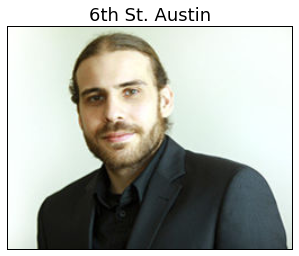

In [2]:
showimage(US_AND_THEM['MYPIC'])
plt.title('6th St. Austin');

And for ink master:

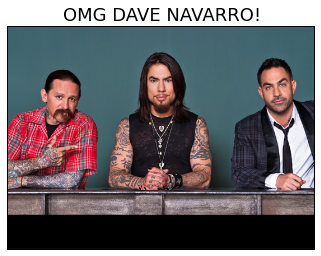

In [3]:
showimage(CELEBS['INKMASTER'])
plt.title("OMG DAVE NAVARRO!");

And so on

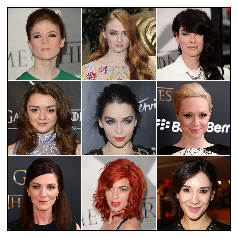

In [4]:
showimage(CELEBS['GOT_GALS']);

#### Face Finding

Next, I have to load Alchemy's Python SDK and then I can pass these images into the face recognition features.

Get an Alchemy api key:
* http://www.alchemyapi.com/api/register.html 

In [5]:
MYACHEMYAPIKEY='YOUAPIRKEY HERE'

In [6]:
!git clone https://github.com/AlchemyAPI/alchemyapi_python.git
!cd alchemyapi_python;python alchemyapi.py $MYACHEMYAPIKEY

fatal: destination path 'alchemyapi_python' already exists and is not an empty directory.
Key: 1b891587df15ff34a282c6c0ca74ac3c679713ef was written to api_key.txt
You are now ready to start using AlchemyAPI. For an example, run: python example.py


In [7]:
import os 
os.chdir(os.path.expanduser('alchemyapi_python/'))
from alchemyapi import AlchemyAPI
api = AlchemyAPI() #<-- Must Instantiate

We can use `AlchemyAPI.faceTagging` to find one or more faces in an image.  For example, the three ink masters:

In [8]:
api.faceTagging('url', CELEBS['INKMASTER'])

{'imageFaces': [{'age': {'ageRange': '35-44', 'score': '0.389988'},
   'gender': {'gender': 'MALE', 'score': '0.970688'},
   'height': '61',
   'identity': {'disambiguated': {'dbpedia': 'http://dbpedia.org/resource/Dave_Navarro',
     'freebase': 'http://rdf.freebase.com/ns/m.01lz4tf',
     'name': 'Dave Navarro',
     'subType': ['Person',
      'Composer',
      'MusicalArtist',
      'Celebrity',
      'FilmMusicContributor',
      'Guitarist',
      'Lyricist',
      'MusicalGroupMember',
      'TVProducer',
      'TVActor'],
     'website': 'http://www.6767.com/',
     'yago': 'http://yago-knowledge.org/resource/Dave_Navarro'},
    'name': 'Dave Navarro',
    'score': '0.970688'},
   'positionX': '244',
   'positionY': '77',
   'width': '61'},
  {'age': {'ageRange': '35-44', 'score': '0.476171'},
   'gender': {'gender': 'MALE', 'score': '0.995504'},
   'height': '72',
   'positionX': '445',
   'positionY': '80',
   'width': '72'},
  {'age': {'ageRange': '45-54', 'score': '0.386022

### Store the Faces Pythonically

Rather than work with these JSON streams, I'll make a class (namedtuple specifically) to store a face.  Some of the metatadata stored on the face will include:
     
     - Pixels in original image where face is
     - Reference to original image
     - Predicted gender and confidence score
     - Predicted ageRange and confidence score
     
The code below defines such a class.  If you're not a programmer, don't worry about this next cell too much.

In [9]:
from collections import namedtuple

# Custom named tuple class, custom printout
Face = namedtuple('Face', ['face', 'index', 'gender', 'genderscore', 'agerange', 'agescore'], verbose=False)
def newrep(obj):
    return 'FACE_{o.index} ({o.gender} {o.genderscore}, {o.agerange} {o.agescore})'.format(o=obj)
Face.__repr__ = newrep

def cutface(image, facetag):
    """ Given original image and JSON face tag, crop out the face. """
    
    def _parseFace(attr):
        return int(facetag[attr])

    X, Y, WIDTH, HEIGHT = _parseFace('positionX'), _parseFace('positionY'), _parseFace('width'), _parseFace('height')
    return image[Y:Y+HEIGHT, X:X+WIDTH]

def mapfaces(facedict):
    """ Takes a dictionary of name:url (see BUDDIES above) and returns name:Face,
    where FACE is the python class for storing image face and metadata.
    """

    out = {}
    for name, imageurl in US_AND_THEM.items():
        try:
            faces = api.faceTagging('url', imageurl)['imageFaces']
        except Exception as exc:
            print ("FAILED ON IMAGE: %s with exception:\n%s" % (name, exc.message))
            continue
        image = skio.imread(imageurl)
        out[name] = []
    
        # Iterate over faces, store
        for (idx, facetag) in enumerate(faces):
            faceregion = cutface(image, facetag)
            gender = facetag['gender']['gender']
            genderscore = float(facetag['gender']['score'])
            agerange = facetag['age']['ageRange']
            agescore = float(facetag['age']['score'])
            if agerange == '<18':
                agerange = '0-18' #<-- For sorting later on
            out[name].append(Face(faceregion, idx, gender, genderscore, agerange, agescore))
    return out
    
# THIS ACTUALLY DOES THE MAPPING
US_AND_THEM = mapfaces(US_AND_THEM)

Now the face regions of the image, as well as the important metadata', are stored in a list of `Face` classes.  The list is called `US_AND_THEM`.  We can access the face image from the `face` attribute, and some images have multiples faces.

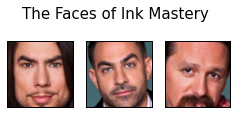

In [10]:
f, axes = plt.subplots(1,3, figsize=(4,2))

for idx, celeb in enumerate(US_AND_THEM['INKMASTER']):
    showimage(celeb.face, ax=axes[idx])

f.suptitle('The Faces of Ink Mastery');

### Analytics

`Alchemy's` facial recognition predicts age range and gender.  It also provides a *confidence score* for these predictions.  For example, for face predicted to be male, how confident in the prediction is the algorithm?  **Let's arrange the faces by increasing confidence in gender prediction...**
<br>
To do so, first, subdivide list by gender.

In [11]:
ALL = []
MEN = []
WOMEN = []
for faces in US_AND_THEM.values():
    for face in faces:
        ALL.append(face)
        if face.gender == 'MALE':
            MEN.append(face)
        else:
            WOMEN.append(face)

In [12]:
def multiface_plot(faces, title=''):
    """ From list of faces, plots each face, maintaining sort order
    and figures out sizing/number of subaxes to create automatically.
    """
    num = len(faces)
    #print("num in faces: "+str(num))
    # Ad-hoc stuff to ensure images sized right
    size=(2+rint(num/2), 2+rint(num*2))
    
    f, axes = plt.subplots(len(faces),1, figsize=size)   
    #Sort faces in each age group by confidence of age group
    for (idx, face) in enumerate(faces):
        showimage(face.face,ax=axes[idx])   
        #plt.tight_layout()
    f.suptitle(title,
               fontsize=16,
               y=1.02)
    return f, axes

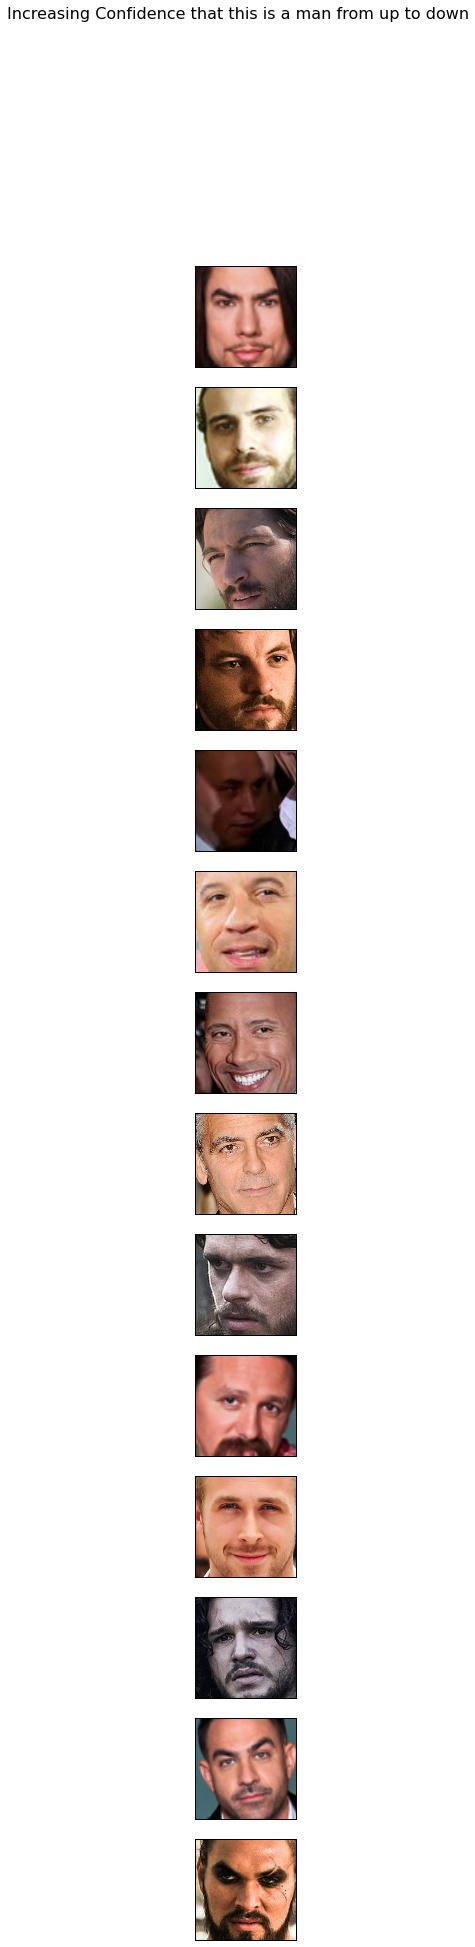

In [13]:
MALECERTAINTY = sorted(MEN, key=lambda x: x.genderscore)
multiface_plot(MALECERTAINTY, title='Increasing Confidence that this is a man from up to down');

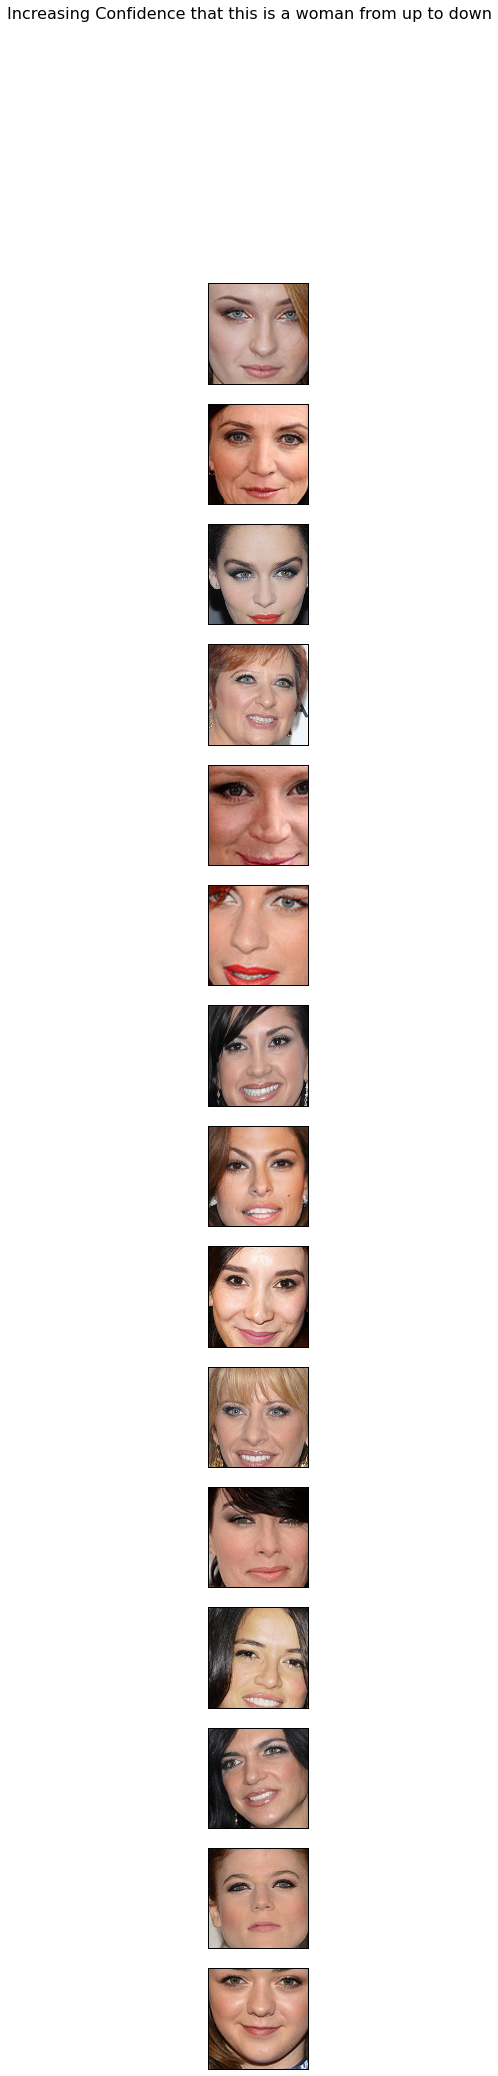

In [14]:
GALCERTAINTY = sorted(WOMEN, key=lambda x: x.genderscore)
multiface_plot(GALCERTAINTY, title='Increasing Confidence that this is a woman from up to down');

It's interesting that Massie William's character Arya Stark hid in plain sight as a boy in GOT season 2, considering she has been predicted female with highest certainty.  I guess `AlchemyAPI` can see things that Tywin Lannister can't...

### Age Prediction

In [15]:
#Get all age groups
agegroups = set([p.agerange for p in ALL])

#Group in dict
BY_AGE = dict((group,[]) for group in agegroups)
for face in ALL:
    BY_AGE[face.agerange].append(face)    

In [16]:
agegroups

{'0-18', '18-24', '25-34', '35-44', '45-54', '55-64'}

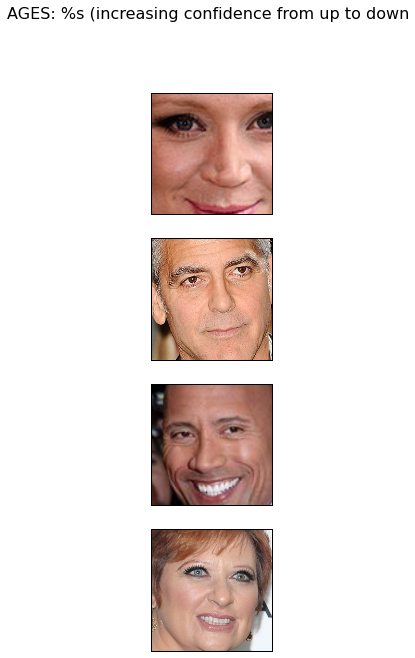

In [17]:
AGECERTAINTY = sorted(BY_AGE['55-64'], key=lambda x: x.agescore)
if(len(AGECERTAINTY)==1):
    showimage(AGECERTAINTY[0].face)
else:
    multiface_plot(AGECERTAINTY, title='AGES: %s (increasing confidence from up to down')

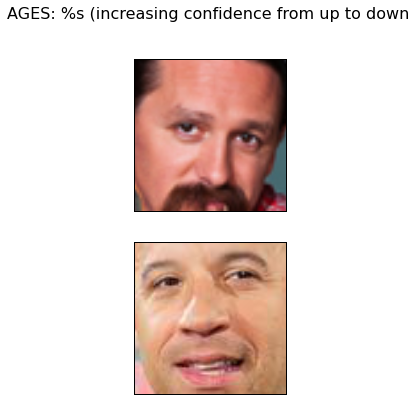

In [18]:
AGECERTAINTY = sorted(BY_AGE['45-54'], key=lambda x: x.agescore)
if(len(AGECERTAINTY)==1):
    showimage(AGECERTAINTY[0].face)
else:
    multiface_plot(AGECERTAINTY, title='AGES: %s (increasing confidence from up to down')

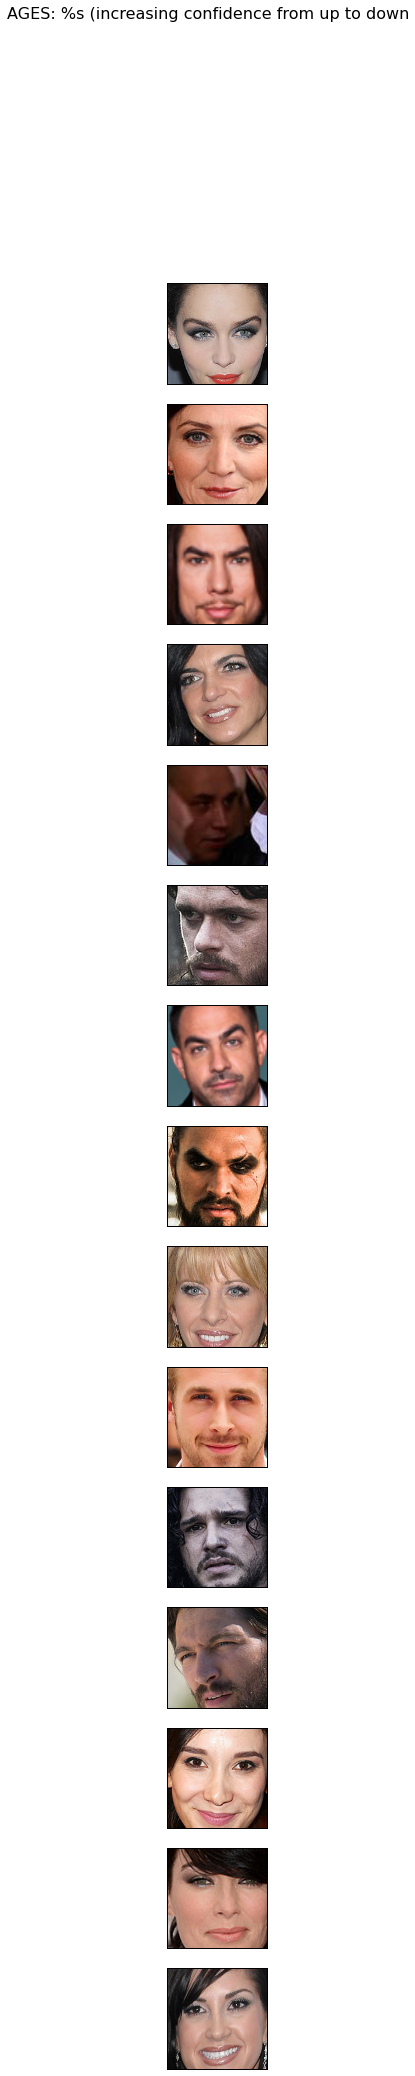

In [19]:
AGECERTAINTY = sorted(BY_AGE['35-44'], key=lambda x: x.agescore)
if(len(AGECERTAINTY)==1):
    showimage(AGECERTAINTY[0].face)
else:
    multiface_plot(AGECERTAINTY, title='AGES: %s (increasing confidence from up to down')

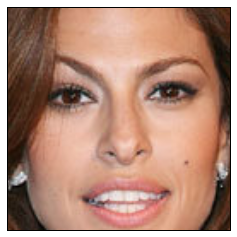

In [20]:
AGECERTAINTY = sorted(BY_AGE['25-34'], key=lambda x: x.agescore)
if(len(AGECERTAINTY)==1):
    showimage(AGECERTAINTY[0].face)
else:
    multiface_plot(AGECERTAINTY, title='AGES: %s (increasing confidence from up to down')

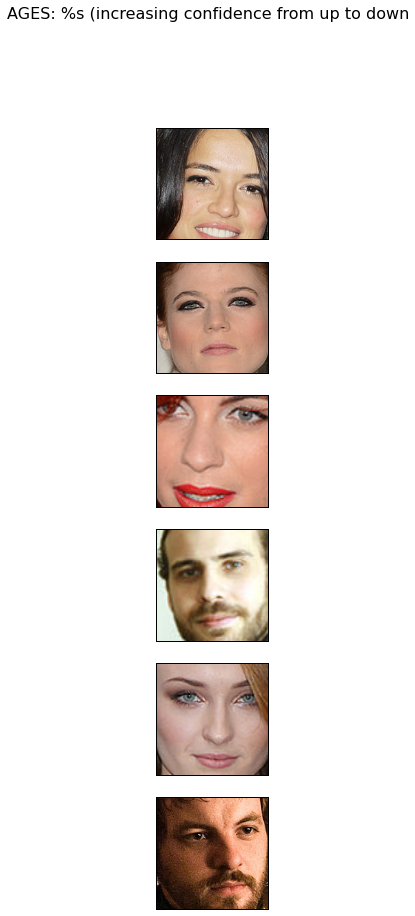

In [21]:
AGECERTAINTY = sorted(BY_AGE['18-24'], key=lambda x: x.agescore)
if(len(AGECERTAINTY)==1):
    showimage(AGECERTAINTY[0].face)
else:
    multiface_plot(AGECERTAINTY, title='AGES: %s (increasing confidence from up to down')

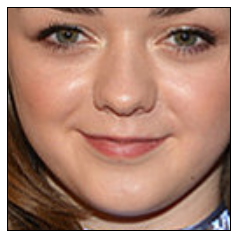

In [22]:
AGECERTAINTY = sorted(BY_AGE['0-18'], key=lambda x: x.agescore)
if(len(AGECERTAINTY)==1):
    showimage(AGECERTAINTY[0].face)
else:
    multiface_plot(AGECERTAINTY, title='AGES: %s (increasing confidence from up to down')

### Let's visualize the spread in confidence scores

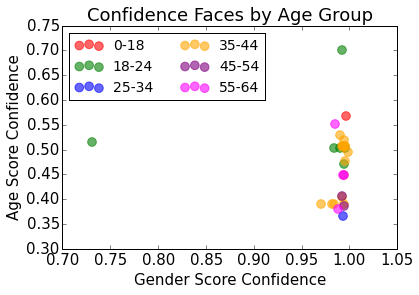

In [23]:
#filter warnings
import warnings
warnings.filterwarnings('ignore')
gscores = [f.genderscore for f in ALL]
ascores = [f.agescore for f in ALL]
ages = [f.agerange for f in ALL]

agecolors = ['r','g','b','orange','purple','magenta']

for (idx, (age, agegroup)) in enumerate(sorted(BY_AGE.items())):
    gscores = [f.genderscore for f in agegroup]
    ascores = [f.agescore for f in agegroup]
    plt.scatter(gscores, ascores, color=agecolors[idx], s=75, alpha=.6)
    
plt.legend(sorted(BY_AGE), loc='upper left', ncol=2, fontsize=14);
plt.xlim(0.7,1.05)
plt.xlabel('Gender Score Confidence')
plt.ylabel('Age Score Confidence')
plt.title('Confidence Faces by Age Group');

**A couple interesting points:**

   1. The prediction of gender is more confident than that of age.  This makes sense, since gender only has 2 categories, while age has 6. 
   2. There are two salient outliers: someone whose gender is less confidently predicted, and someone whose age is most confidently predicted.  Both of these folks are 18-24.  Who are these folks?  

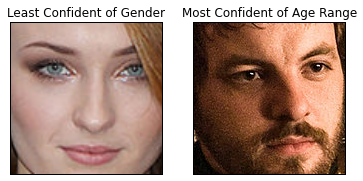

In [24]:
#Get face with lowest gender score
youngins = BY_AGE['18-24']
mingender = min(youngins, key=lambda x: x.genderscore).face
maxage = max(youngins, key=lambda x: x.agescore).face

f, (ax1, ax2) = plt.subplots(1,2)

showimage(mingender, ax=ax1)
showimage(maxage, ax=ax2)
ax1.set_title('Least Confident of Gender', fontsize=12)
ax2.set_title('Most Confident of Age Range', fontsize=12);

[Gethin Anthony](http://unitedagents.co.uk/gethin-anthony) is 31 by the way, but I'd have to agree that he doesn't look it!

### What does this all mean?

Before reading too much into age range or gender confidence, the point of this exercise was really just to show some new tools available to researchers, and just how accessible facial recognition has become.  The goal was **not** to provide a robust quantification of age or gender.  Remember, we're using just a single picture for each person.  We haven't taken into account the vast amount of variation in the same person's face from image to image, due to facial hair, expression, image quality, lighting and many other factors.   

<br>

When we talk of *gender confidence*, we're using a convenient mental notion to refer to what, in actuality, is an abstruse computed quantity.  The *confidence* of a machine-learning predictor is both a reflection of the image set upon which it was trained, and the intrinsic preferences and biases of the method.  For example, there could have been an over-represented sampling of guys with fat cheeks in the 18-24 age range.  In that case, my less-than-sober selfy is more likely seem like that of a spry 24 year old, as alcohol kind of makes my cheeks puffy.  I'm not suggesting this is actually the case, or that there's any fault with the underlying methods or training data, just that without fully understanding the intricate prediction process and its limitations, it's not worth getting too invested in what the results of this excercise really "mean".  

<br>

**In other words, your gender is that with which you identify, and you're really only as old as you feel** 

<img src="http://www.geckorecruitment.com/wp-content/uploads/2013/10/smiley_face.jpg" alt="HTML5 Icon" style="width:600;height:128px">

<hr>
<br>
This is an adapated version of : [Faces and Friends](https://github.com/hugadams/twitter_play/blob/master/FACESANDFRIENDS.ipynb)

* Adam Hughes: hughesadam87@gmail.com 
* twitter:  <a href="https://twitter.com/hughesadam87" target="_blank">@hughesadam87</a>
* <a href="http://www.gwu.edu/~condmat/CME/reeves.html" target="_blank">Mark Reeves Biophysics Group</a>